In [24]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Telcom Churn Data Import

In [26]:
# import the telcom churn csv data
telcom_data_df = pd.read_excel(Path('../resources/telcom_customer_data.xlsx'))
telcom_data_df.shape # (4250, 10)
telcom_data_df.head()

,state,age,area_code,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,number_customer_service_calls,churn
0,OH,42,area_code_415,1,26,161.6,123,27.47,1,no
1,NJ,36,area_code_415,0,0,243.4,114,41.38,0,no
2,OH,39,area_code_408,0,0,299.4,71,50.90,2,no
3,OK,41,area_code_415,0,0,166.7,113,28.34,3,no
4,MA,34,area_code_510,1,24,218.2,88,37.09,3,no


In [27]:
# Modify the area_code column by removing the "area_code_" part of the string from every entry.
telcom_data_df['area_code'] = telcom_data_df['area_code'].str.replace('area_code_', '')
# Modify the churn column by replacing the "yes" with a 1 and "no" with a 0.
telcom_data_df['churn'] = telcom_data_df['churn'].replace({'yes': 1, 'no': 0})
telcom_data_df.head()

C:\Users\lerch\AppData\Local\Temp\ipykernel_184272\386215360.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telcom_data_df['churn'] = telcom_data_df['churn'].replace({'yes': 1, 'no': 0})


,state,age,area_code,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,number_customer_service_calls,churn
0,OH,42,415,1,26,161.6,123,27.47,1,0
1,NJ,36,415,0,0,243.4,114,41.38,0,0
2,OH,39,408,0,0,299.4,71,50.90,2,0
3,OK,41,415,0,0,166.7,113,28.34,3,0
4,MA,34,510,1,24,218.2,88,37.09,3,0


Now that the churn column contains numerical values, we can calculate the churn rate. It’s a business metric that gives us the percentage of people who stopped using the product during a given time period. We can calculate this metric for our data as follows:

 $$Churn Rate = (churned / total customers) ∗ 100$$
Please note that all our rows correspond to customer data from the same time period. The formula above reflects that as well.

The above metric can present us with a good overview of the percentage of user churn. As a business, of course, the goal is to minimize churn.

Instructions
In an empty cell, calculate the churn rate.
In a Text Box, briefly describe whether you think the churn rate is high or not.
Keep in mind that different industries have different average churn rates.
We encourage you to look up articles or reports online that can help you interpret your calculated churn rate.

In [31]:
churn_rate = telcom_data_df['churn'].value_counts()[1] / telcom_data_df['churn'].count()

# convert to percentage
churn_rate = churn_rate * 100
churn_rate

14.070588235294117

NameError: name 'pie_label' is not defined

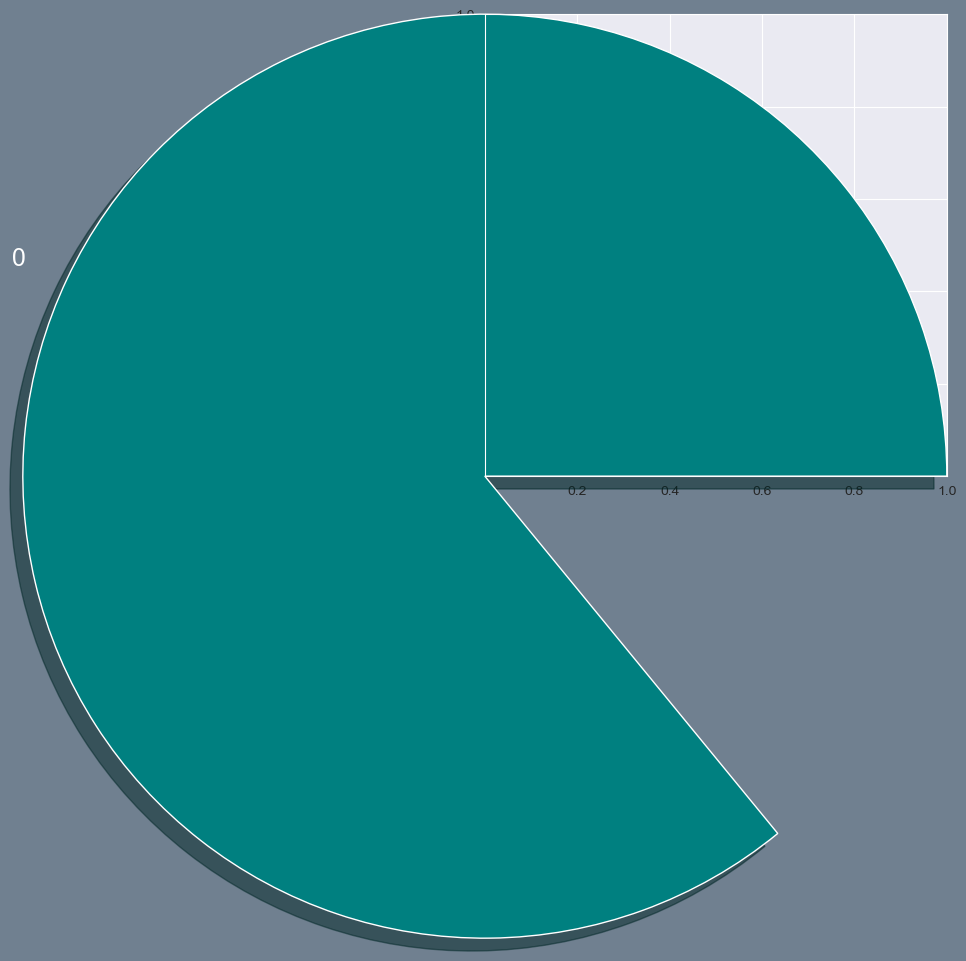

In [33]:
plt.figure(figsize=(9,6), facecolor='slategray')
churn = telcom_data_df['churn'].value_counts()
colors = ['teal', 'indianred']
sns.set_style('darkgrid')
plt.pie(churn, labels=churn.index, autopct=lambda pct: pie_label(pct, churn), colors=colors, shadow=True, textprops=dict(color='white', fontsize=18))
plt.title("Customer Churn", color='white', loc='center', weight='bold', fontsize=20)
plt.legend(title='is churn')
plt.show()


Initial EDA
The overallchurn rate is about ~14%.
We will now calculate some descriptive statistics and start investigating the types of customers who churn.

Let's start with using the COUNTBLANK function to check if there are any missing values in our data. Since we are working with an already-cleaned dataset, there should be no missing values. However, it’s always a good idea to check for them when working with any dataset. 